<a href="https://colab.research.google.com/github/june65/Image_Classification/blob/main/Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

In [2]:
model.compile(loss='mse', optimizer='SGD')

In [3]:
model.fit([1], [[0, 1, 0]], epochs=1)
model.evaluate([1], [[0, 1, 0]])

1/1 [==============================] - 0s 114ms/step - loss: 1.0453


1.0453256368637085

In [4]:
history = model.fit([1], [[0, 1, 0]], epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0453
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0176
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 0.9907
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9644
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9389
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.9140
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8898
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8662
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8433
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8210
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7992
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7780
Epoch 13/100
1/1 [==============================] -

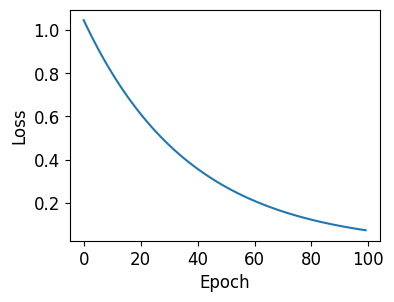

In [9]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1], use_bias=False)])
model.compile(loss='mse', optimizer='SGD')

pred = model.predict([1])
print(pred)
print(model.get_weights())

plt.bar(np.arange(3), pred[0])
plt.ylim(-1.1, 1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
plt.savefig('./plt/pred000.png')
plt.clf()

epochs = 500
for i in range(1, epochs+1):
  model.fit([1], [[0, 1, 0]], epochs=1, verbose=0)
  pred = model.predict([1])

  if i % 25 == 0:
      plt.bar(np.arange(3), pred[0])
      plt.ylim(-1.1, 1.1)
      plt.xlabel('Output Node')
      plt.ylabel('Output')
      plt.text(-0.4, 0.8, 'Epoch ' + str(i))
      plt.tight_layout()
      plt.savefig('./plt/pred' + str(i).zfill(3) + '.png')
      plt.clf()

print(pred)
print(model.get_weights())

[[-0.5095548  -0.7187625   0.08668923]]
[array([[-0.5095548 , -0.7187625 ,  0.08668923]], dtype=float32)]
[[-0.0179761   0.9393657   0.00305823]]
[array([[-0.0179761 ,  0.9393657 ,  0.00305823]], dtype=float32)]


<Figure size 400x300 with 0 Axes>

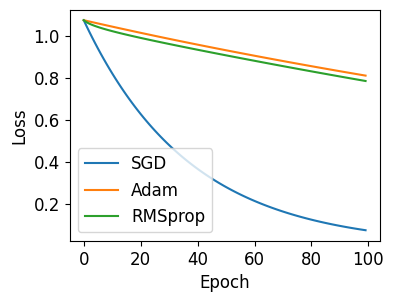

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

tf.random.set_seed(0)
model2 = tf.keras.models.clone_model(model)

tf.random.set_seed(0)
model3 = tf.keras.models.clone_model(model)

model.compile(loss='mse', optimizer='SGD')
model2.compile(loss='mse', optimizer='Adam')
model3.compile(loss='mse', optimizer='RMSprop')

history = model.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history2 = model2.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history3 = model3.fit([1], [[0, 1, 0]], epochs=100, verbose=0)

loss = history.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']
plt.plot(loss, label='SGD')
plt.plot(loss2, label='Adam')
plt.plot(loss3, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()